### Importing Libraries

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from warnings import filterwarnings

### Getting Data

In [3]:
IBOVESPA = yf.Ticker("^BVSP")
hist = IBOVESPA.history(start='1994-01-01', end='2022-12-31')

In [4]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-01-03 00:00:00-02:00,375.500000,380.100006,373.399994,380.100006,0,0,0
1994-01-04 00:00:00-02:00,380.100006,400.600006,380.100006,400.600006,0,0,0
1994-01-05 00:00:00-02:00,400.600006,435.700012,400.600006,421.100006,0,0,0
1994-01-06 00:00:00-02:00,421.100006,446.500000,421.100006,444.200012,0,0,0
1994-01-07 00:00:00-02:00,444.200012,476.600006,444.200012,476.399994,0,0,0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,107552.000000,109994.000000,107552.000000,109698.000000,12847100,0,0
2022-12-26 00:00:00-03:00,109699.000000,109755.000000,108309.000000,108738.000000,5219500,0,0
2022-12-27 00:00:00-03:00,108739.000000,109353.000000,107418.000000,108347.000000,11158100,0,0


In [5]:
df_ibov = hist.resample('MS').first().Close

In [6]:
df_ibov.head()

Date
1994-01-01 00:00:00-02:00     380.100006
1994-02-01 00:00:00-02:00     826.900024
1994-03-01 00:00:00-03:00    1073.300049
1994-04-01 00:00:00-03:00    1355.000000
1994-05-01 00:00:00-03:00    1725.699951
Freq: MS, Name: Close, dtype: float64

In [8]:
train = df_ibov.loc['1994-01-01':'2021-12-01']
test = df_ibov.loc['2022-01-01':]

### Data Visualization

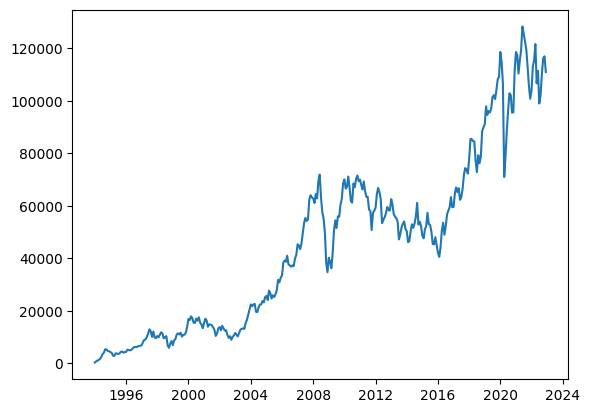

In [7]:
plt.plot(df_ibov)

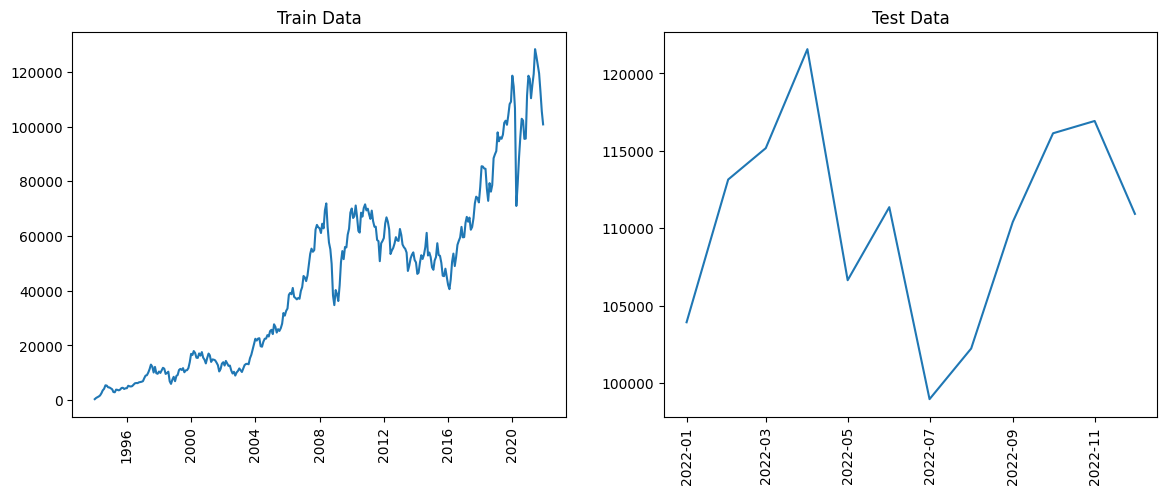

In [40]:
filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.plot(train)
ax1.set_title("Train Data")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.plot(test)
ax2.set_title("Test Data")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

In [41]:
decompose = seasonal_decompose(df_ibov)

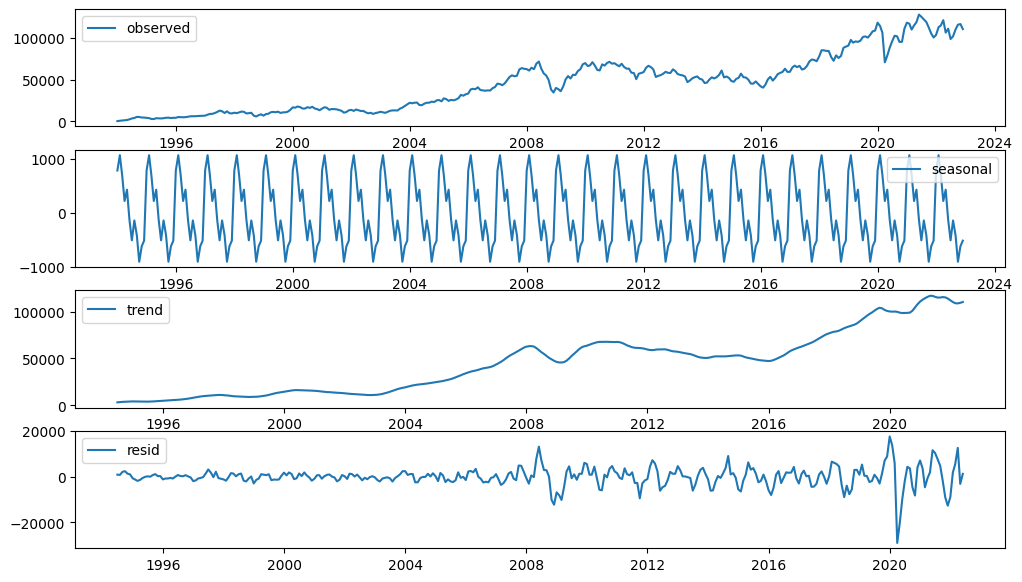

In [42]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,7))
axis = [ax1,ax2,ax3,ax4]
ax1.plot(decompose.observed, label='observed')
ax2.plot(decompose.seasonal, label='seasonal')
ax3.plot(decompose.trend, label='trend')
ax4.plot(decompose.resid, label='resid')
for i in axis:
    i.legend(loc='best')

### ARIMA model

In [12]:
stepwise_model = auto_arima(train,
                            start_p=1, 
                            start_q=1, 
                            start_d=0, 
                            start_P=0, 
                            max_p=5, 
                            max_q=5, 
                            m=12,
                            seasonal=True, 
                            trace=True,
                            stepwise=True,
                            error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=6473.739, Time=10.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6478.069, Time=11.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6473.979, Time=10.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6472.197, Time=11.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6478.143, Time=10.26 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6470.287, Time=10.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=6472.189, Time=10.46 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=6474.153, Time=10.67 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6471.803, Time=9.72 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=6470.680, Time=10.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6472.216, Time=10.35 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=6470.525, Time=10.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=6469.744, Time=10.25 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=6471.599, Time=9.99 sec
 ARIMA(

In [13]:
model = SARIMAX(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)

In [14]:
model_fit = model.fit()
future_preds = model_fit.forecast(steps=12)

In [16]:
future_forecast = pd.DataFrame(future_preds, index=test.index).rename(columns={"predicted_mean":'Close Forecast'})

### Results

<AxesSubplot: xlabel='Date'>

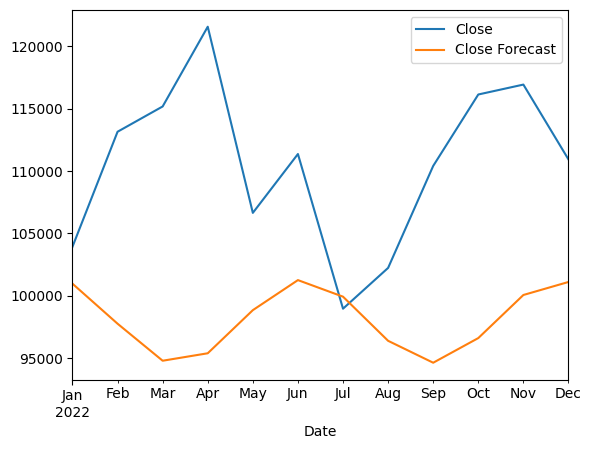

In [17]:
pd.concat([test, future_forecast], axis=1).plot()